<a href="https://colab.research.google.com/github/richardp123456/PersonalProjects/blob/main/Pilz_R_IA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

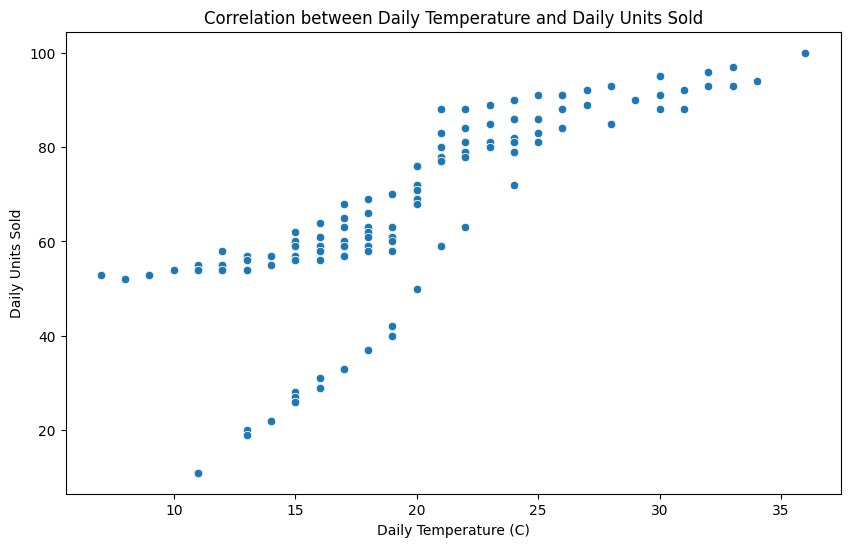

<ipython-input-3-ef0c9e46939c>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_data = sales_data.resample('M', on='Date').mean()


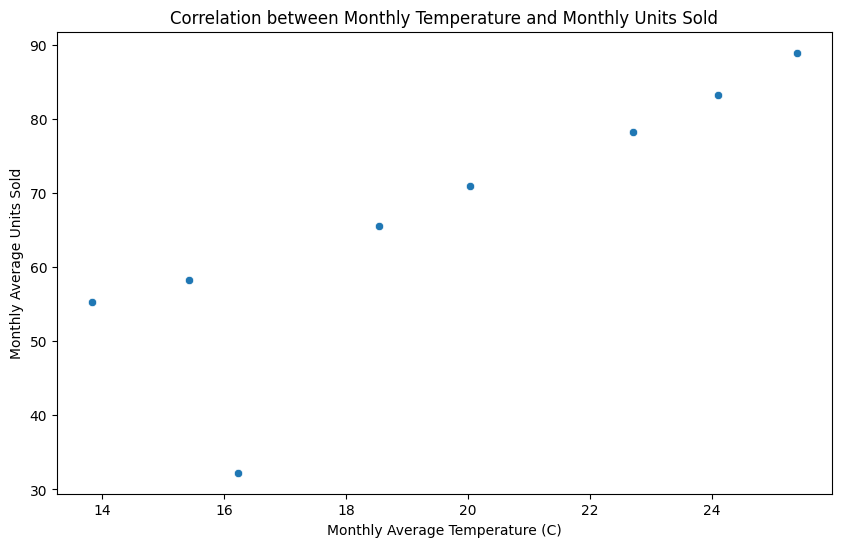

<ipython-input-3-ef0c9e46939c>:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment_data = sentiment_data.resample('M', on='Review Date')['Rating'].mean()


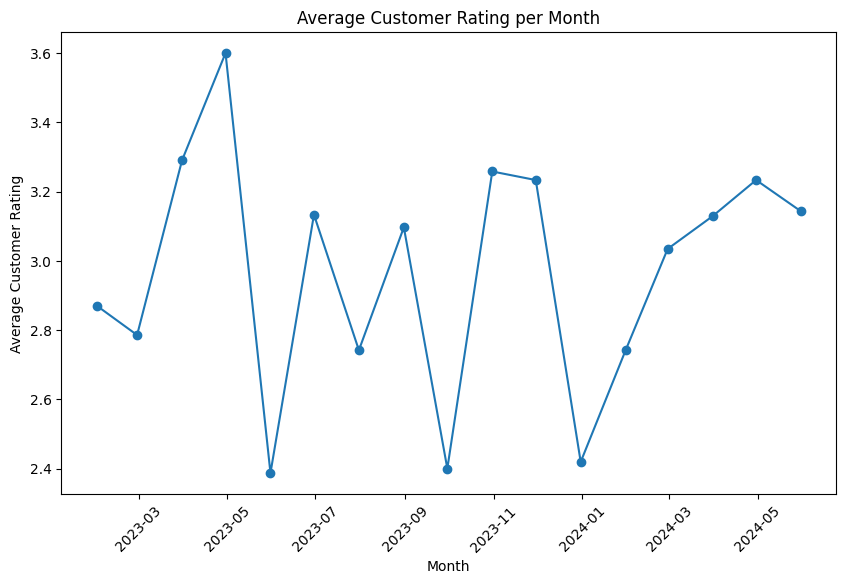

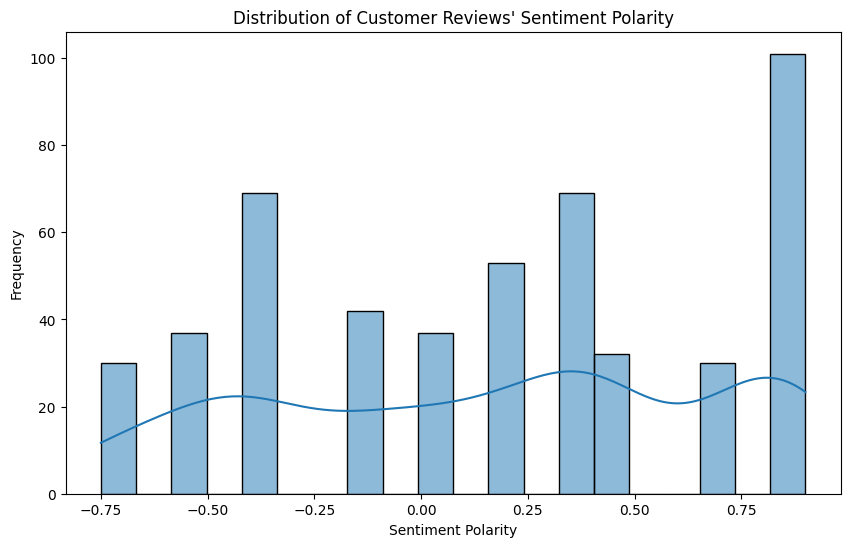

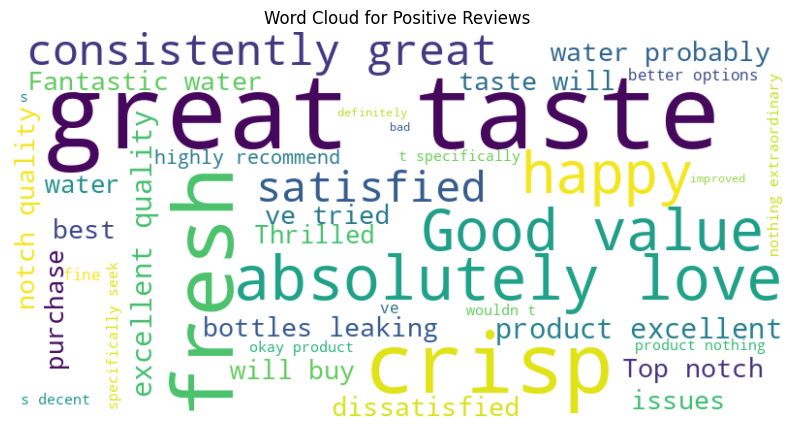

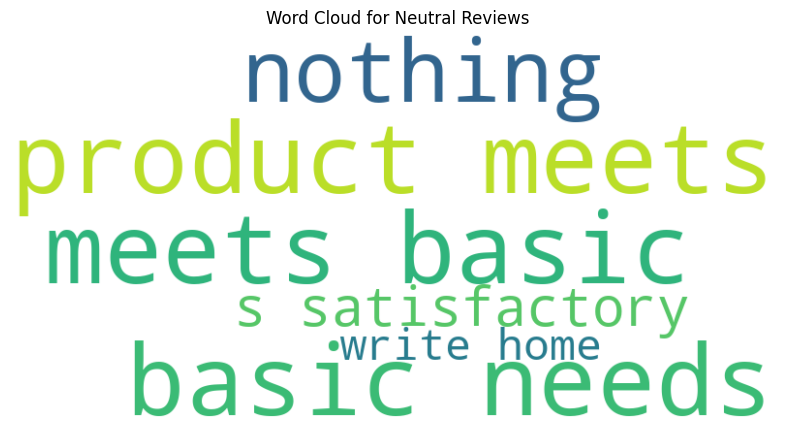

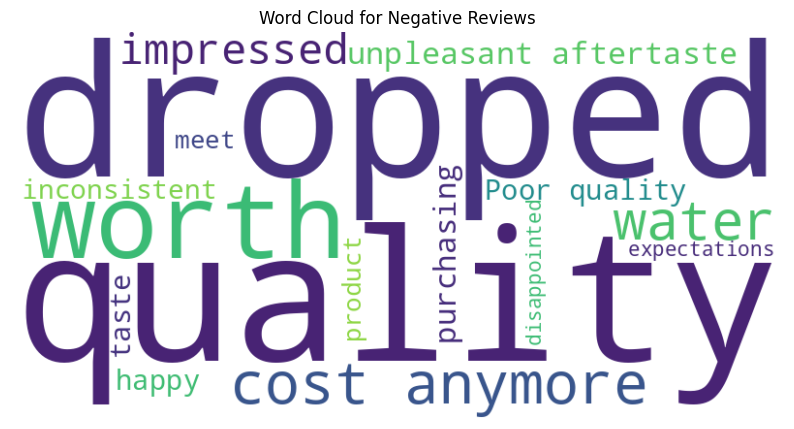

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the sales data file, copy path from google colab
file_path_sales = '/content/daily_sales (3).csv'
sales_data = pd.read_csv(file_path_sales)

# Clean the sales data
sales_data = pd.read_csv(file_path_sales, skiprows=2)
sales_data.columns = ['Date', 'Daily Units Sold', 'Daily Unit Price', 'Daily Temperature (C)']
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%m/%d/%Y')

# Load the customer sentiment data, copy path from google colab
file_path_sentiment = '/content/water_product_reviews_500_actual_names (1) (1).csv'
sentiment_data = pd.read_csv(file_path_sentiment)
sentiment_data['Review Date'] = pd.to_datetime(sentiment_data['Review Date'], format='%Y-%m-%d')

# 1. Correlation between the sales performance and temperature (daily data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Temperature (C)', y='Daily Units Sold', data=sales_data)
plt.title('Correlation between Daily Temperature and Daily Units Sold')
plt.xlabel('Daily Temperature (C)')
plt.ylabel('Daily Units Sold')
plt.show()

# 2. Correlation between the sales performance and temperature (monthly data)
monthly_sales_data = sales_data.resample('M', on='Date').mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Temperature (C)', y='Daily Units Sold', data=monthly_sales_data)
plt.title('Correlation between Monthly Temperature and Monthly Units Sold')
plt.xlabel('Monthly Average Temperature (C)')
plt.ylabel('Monthly Average Units Sold')
plt.show()

# 3. Average Customer Rating per Month (from sentiment data)
monthly_sentiment_data = sentiment_data.resample('M', on='Review Date')['Rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment_data.index, monthly_sentiment_data.values, marker='o') # Use .values to access the values in the Series
plt.title('Average Customer Rating per Month')
plt.xlabel('Month')
plt.ylabel('Average Customer Rating')
plt.xticks(rotation=45)
plt.show()

# 4. Sentiment Polarity Distribution
# Create a new column 'Sentiment Polarity' by applying TextBlob to the customer reviews
sentiment_data['Sentiment Polarity'] = sentiment_data['Review Text'].apply(lambda review: TextBlob(review).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(sentiment_data['Sentiment Polarity'], bins=20, kde=True)
plt.title('Distribution of Customer Reviews\' Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Bonus: Word Cloud for Positive, Neutral, and Negative Sentiments
# Split reviews into positive, neutral, and negative categories based on polarity
positive_reviews = sentiment_data[sentiment_data['Sentiment Polarity'] > 0]['Review Text']
neutral_reviews = sentiment_data[sentiment_data['Sentiment Polarity'] == 0]['Review Text']
negative_reviews = sentiment_data[sentiment_data['Sentiment Polarity'] < 0]['Review Text']

# Generate Word Clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')
generate_wordcloud(neutral_reviews, 'Word Cloud for Neutral Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')
